In [27]:
import qutip as qt
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sys  
sys.path.append("/Users/sabhy/Downloads/quantum_simulation/Quantum simulation/QLLM/quantum-simulation-main/src/quantum_simulation/")
import ED as ED

In [11]:
def generate_plaquette(num_plaquette = 4, bc = "periodic"):
    num_qubits = num_plaquette*3
    p_i = (0, 1, 2, 3)
    p_f = (num_qubits-2, 3, num_qubits-1, num_qubits-4)
    p = (4, 5, 6, 1)
    plaqs = [p_i, p]
    for i in range(1, num_plaquette-2):
        p = (p[0]+3, p[1]+3, p[2]+3, p[1])
        plaqs.append(p)
    plaqs.append(p_f)
    return num_qubits, plaqs
    
num_qubits, plaquettes = generate_plaquette(4)
#num_qubits, plaquettes

In [13]:
num_qubits, plaquettes

(12, [(0, 1, 2, 3), (4, 5, 6, 1), (7, 8, 9, 5), (10, 3, 11, 8)])

In [15]:
N  = num_qubits
#plaquettes =[(2,3,1,0),(5,0,4,3)]#,(6,7,9,8),(9,10,0,11)]
#plaquettes = [(0,1,2,3),(4, 5, 6, 1),(7,8,9,5),(10,11,12,8),(13,14,15,11),(16,3,17,14)]
#plaquettes = [(0,1,2,3),(4, 5, 6, 1),(7,8,9,5),(10,3,11,8)]
#plaquettes = [(0,1,2,3),(4, 3,5, 1)]
si_list, sx_list, sy_list, sz_list, sp_list, sm_list = ED.spin_operator(N)


In [17]:
h_1 = 0
h_2 = 0
for p in plaquettes:
    t = sp_list[p[0]]*sp_list[p[1]]*sm_list[p[2]]*sm_list[p[3]]
    h_1 += t+t.dag()
    h_2 += 1*(t+t.dag())**2
    
H=-1*h_1 +h_2

In [19]:
p1=plaquettes[0]
p2=plaquettes[1]
p3=plaquettes[2]
p4=plaquettes[3]
#p5=plaquettes[4]
#p6=plaquettes[5]

In [21]:
u1 = sp_list[p1[0]]*sp_list[p1[1]]*sm_list[p1[2]]*sm_list[p1[3]]
u_1 = u1+u1.dag()
s1 = 1*(u1+u1.dag())**2


In [23]:
u2 = sp_list[p2[0]]*sp_list[p2[1]]*sm_list[p2[2]]*sm_list[p2[3]]
u_2 = u2+u2.dag()
s2 = 1*(u2+u2.dag())**2

In [17]:

u3 = sp_list[p3[0]]*sp_list[p3[1]]*sm_list[p3[2]]*sm_list[p3[3]]
u_3 = u3+u3.dag()
s3 = 1*(u3+u3.dag())**2

In [20]:

u4 = sp_list[p4[0]]*sp_list[p4[1]]*sm_list[p4[2]]*sm_list[p4[3]]
u_4 = u4+u4.dag()
s4 = 1*(u4+u4.dag())**2

In [21]:
u5 = sp_list[p5[0]]*sp_list[p5[1]]*sm_list[p5[2]]*sm_list[p5[3]]
u_5 = u5+u5.dag()
s5 = 1*(u5+u5.dag())**2

In [22]:

u6 = sp_list[p6[0]]*sp_list[p6[1]]*sm_list[p6[2]]*sm_list[p6[3]]
u_6= u6+u6.dag()
s6 = 1*(u6+u6.dag())**2

In [7]:
H = -u_1 + 2.5*u_2

In [ ]:
ee, es = (u_2).eigenstates()
ee[:]

In [1]:
for k,e in enumerate(ee):
    #print(k, e, [(es[k].dag()*sz_list[i]*es[k]).full().squeeze().real for i in range(N)])
    #print("---------------------------------")

IndentationError: expected an indented block (1133926659.py, line 3)

In [2]:
#[(i,(es[i].dag()*H*es[63]).full()) for i,e in enumerate(ee)]

In [31]:
gaus_index=[i for i, e in enumerate(ee) if e>0]
H_eff = np.zeros((len(gaus_index), len(gaus_index)), dtype=complex)

for ic,i in enumerate(gaus_index):
    for jc,j in enumerate(gaus_index):
        #print(i,j,(es[i].dag()*(u_1+u_2)*es[j]).full().squeeze())
        H_eff[ic,jc] = (es[i].dag()*(u_1+u_2)*es[j]).full().squeeze()

In [32]:
Heff=qt.Qobj(H_eff)
Heff.isherm

True

In [33]:
psi0 = es[-1]
tlist = np.arange(0, 5.1, 0.01)
result = qt.mesolve(H, psi0, tlist)

In [34]:
lst = result.states[-1]
[(lst.dag()*sz_list[i]*lst).full().squeeze().real for i in range(N)]

[array(-0.61937589),
 array(-0.23875177),
 array(0.61937589),
 array(0.23875177),
 array(0.61937589),
 array(0.23875177),
 array(-0.61937589),
 array(-0.61937589),
 array(-0.23875177),
 array(0.61937589),
 array(0.61937589),
 array(-0.61937589)]

In [35]:
pnum_list = []
for k,t in enumerate(tlist):
    pnum_list.append((result.states[k].dag()*u_2*result.states[k]).full().squeeze().real)

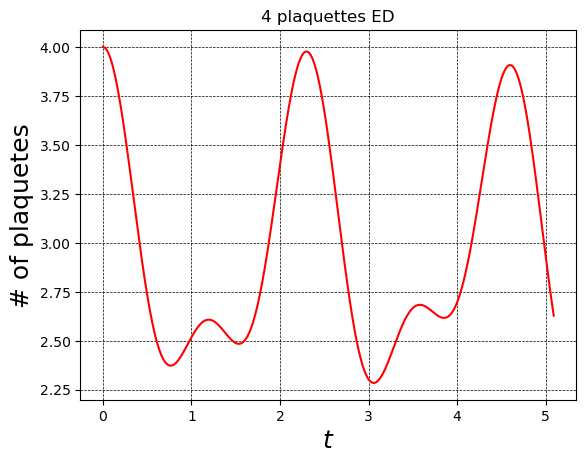

In [46]:
plt.plot(tlist, pnum_list, 'r', label='ED')
#plt.plot(tlist, czz_list, 'blue',label='Quantum simulator')
plt.ylabel(r"# of plaquetes", size=18)
plt.xlabel(r"$t$", size=18)
plt.title("4 plaquettes ED")
 
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.savefig(fname='4plaq')

#### Krylov test

In [31]:
from qutip import  krylovsolve
czz_list8=[]
H = H
S = h_2
psi0 = psi8
tlist = np.arange(0, 10, 0.1)

results = krylovsolve(H, psi0, tlist, krylov_dim=20, e_ops=S, sparse= True)
#czz_list=[]
#czz_list.append(czz)

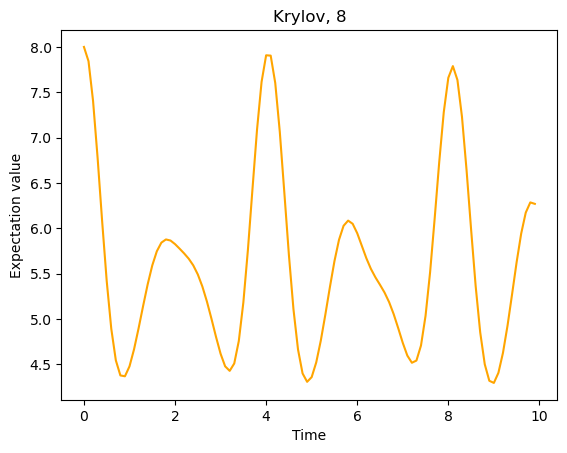

In [36]:
plt.figure()
for expect in results.expect:
    czz_list8.append(expect)
    plt.plot(tlist, expect,color='orange')
    #print(tlist,expect)
#plt.legend(('jmat x', 'jmat y', 'jmat z'))

plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.title('Krylov, 8')
plt.show()


In [34]:
import matplotlib.pyplot as plt

In [12]:
#ktlist2
np.savetxt("tlist8_10.txt",ktlist8)

In [11]:
#ktlist2
np.savetxt("czzlist8_10.txt",sklist8)

In [10]:
ktlist8 = [i for i in tlist]
sklist8 =[i for i in list(np.array(czz_list8).squeeze())]
#sklist2 =[i for i in list(np.array(czz_list2).squeeze())]

In [69]:
ktlist4 = [i for i in tlist]
sklist4 =[i for i in list(np.array(czz_list4).squeeze())]
#sklist2 =[i for i in list(np.array(czz_list2).squeeze())]

In [70]:
#ktlist2
np.savetxt("tlist4_10.txt",ktlist4)

In [71]:
#sklist2
np.savetxt("sklist4_10.txt",sklist4)


In [77]:
from qutip import  krylovsolve
czz_list6=[]
H = -u_1 + 1*u_2
S = u_2
psi0 = psi6
tlist = np.arange(0, 10, 0.01)

results = krylovsolve(H, psi0, tlist, krylov_dim=30, e_ops=S, sparse= True)
#czz_list=[]
#czz_list.append(czz)

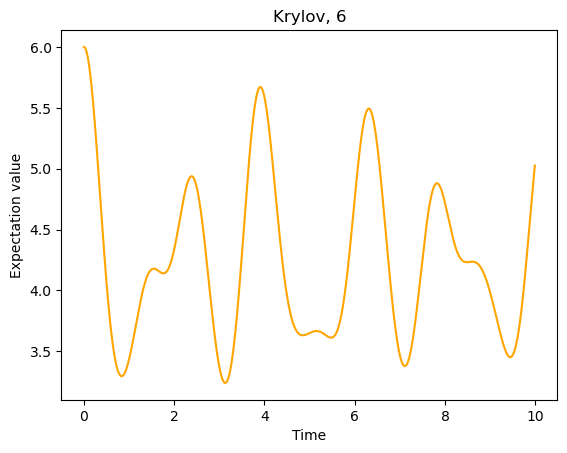

In [78]:
plt.figure()
for expect in results.expect:
    czz_list6.append(expect)
    plt.plot(tlist, expect,color='orange')
    #print(tlist,expect)
#plt.legend(('jmat x', 'jmat y', 'jmat z'))

plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.title('Krylov, 6')
plt.show()


In [79]:
ktlist6 = [i for i in tlist]
sklist6 =[i for i in list(np.array(czz_list6).squeeze())]
#sklist2 =[i for i in list(np.array(czz_list2).squeeze())]

In [80]:
np.savetxt("tlist6_10.txt",ktlist6)


In [81]:
np.savetxt("sklist6_10.txt",sklist6)

###### ktlist6

In [ ]:
czz_list1=[]

S = s1*s4
psi0 = psi6
tlist = np.arange(0, 10, 0.1)

results = krylovsolve(H, psi0, tlist, krylov_dim=30, e_ops=S, sparse= True)

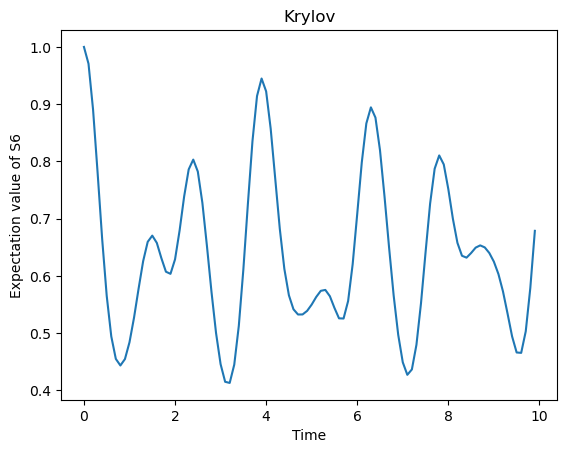

In [25]:
czz = []
S = s2*s4
psi0 = psi6
tlist = np.arange(0, 10, 0.1)

results = krylovsolve(H, psi0, tlist, krylov_dim=30, e_ops=S, sparse= True)
plt.figure()
for expect in results.expect:
    plt.plot(tlist, expect)
    czz.append(results.expect)


plt.xlabel('Time')
plt.ylabel('Expectation value of S6')
plt.title('Krylov')
plt.show()
#plt.savefig('kry_6_10.png')

In [37]:
#plt.plot(ktlist, sklist,label='krylov method',  marker='.', markersize='0.05', color='yellow')
#plt.show()

In [38]:
#print(czz_list.)

In [17]:
H = -u_1 + u_2
S = u_2
psi0 = psi6
tlist = np.arange(0, 10.1, 0.01)

results = krylovsolve(H, psi0, tlist, krylov_dim=20)


In [26]:
#print(results)
#results.states

In [146]:
# N  = 12
# #plaquettes =[(0,1,2,3),(4,3,5,1)]#,(6,7,9,8),(9,10,0,11)]
# plaquettes = [(0,1,2,3),(4, 5, 6, 1),(7,8,9,5),(10,11,12,8),(13,14,15,11),(16,3,17,14)]
# #plaquettes = [(0,1,2,3),(4, 5, 6, 1),(7,8,9,5),(10,3,11,8),]
# si_list, sx_list, sy_list, sz_list, sp_list, sm_list = ED.spin_operator(N)


In [10]:
plaquettes = [(0,1,2,3),(4, 5, 6, 1),(7,8,9,5),(10,11,12,8),(13,14,15,11),(16,3,17,14)]

In [11]:
u_1 = 0
u_2 = 0
for p in plaquettes:
    u = sp_list[p[0]]*sp_list[p[1]]*sm_list[p[2]]*sm_list[p[3]]
    u_1 += u+u.dag()
    u_2 += 1*(u+u.dag())**2

In [12]:
H = -u_1 + u_2

In [27]:
S = u_2
psi0 =psi6
tlist = np.arange(0, 10.1, 0.01)

results = krylovsolve(H, psi0, tlist, krylov_dim=30, e_ops=S, sparse = True)

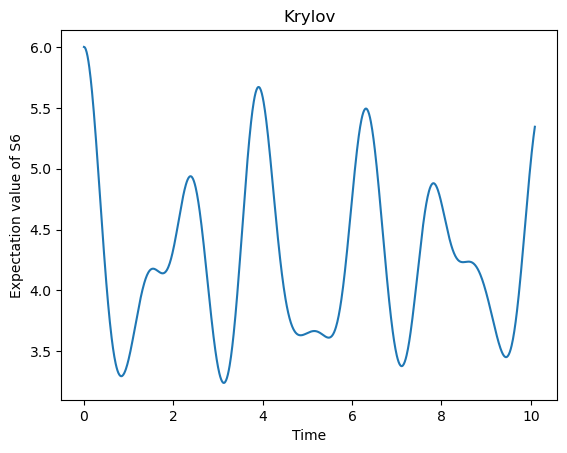

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure()
for expect in results.expect:
   plt.plot(tlist, expect)
#plt.legend(('jmat x', 'jmat y', 'jmat z'))
plt.xlabel('Time')
plt.ylabel('Expectation value of S6')
plt.title('Krylov')
plt.show()
plt.savefig('kry_6_10.png')

In [28]:
plt.savefig('kry_6_10')

<Figure size 640x480 with 0 Axes>

In [165]:
plt.savefig('kry_460')

<Figure size 640x480 with 0 Axes>

In [44]:
print(es[-1])

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (4096, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [23]:
from qutip import *

In [23]:
psi6 =tensor([basis(2, 0), 
             basis(2, 0),
             basis(2, 1), 
             basis(2, 1),
             basis(2, 1), 
             basis(2, 1),
             basis(2, 0), 
             basis(2, 0),
             basis(2, 0), 
             basis(2, 1),
             basis(2, 1), 
             basis(2, 1),
             basis(2, 0), 
             basis(2, 0),
             basis(2, 0), 
             basis(2, 1),
             basis(2, 1), 
             basis(2, 0)])

In [ ]:
psi4 =tensor([basis(2, 0), 
             basis(2, 0),
             basis(2, 1), 
             basis(2, 1),
             basis(2, 1), 
             basis(2, 1),
             basis(2, 0), 
             basis(2, 0),
             basis(2, 0), 
             basis(2, 1),
             basis(2, 1), 
             basis(2, 0),
             ])

In [112]:
a =basis(2,0)
b= basis(2,1)
print(a)
print(b)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


In [49]:
psi2 =tensor([basis(2, 0), 
             basis(2, 0),
             basis(2, 1), 
             basis(2, 1),
             basis(2, 1), 
             basis(2, 0),
            ])

In [25]:
psi8 =tensor([basis(2, 0),
             basis(2, 0),
             basis(2, 1),
             basis(2, 1),
             basis(2, 1),
             basis(2, 1),
             basis(2, 0),
             basis(2, 0),
             basis(2, 0),
             basis(2, 1),
             basis(2, 1),
             basis(2, 1),
             basis(2, 0),
             basis(2, 0),
             basis(2, 0),
             basis(2, 1),
             basis(2, 1),
             basis(2, 1),
             basis(2, 0),
             basis(2, 0),
             basis(2, 0),
             basis(2, 1),
             basis(2, 1),
             basis(2, 0)])
